#Matplotlib

Objetivos:

* Crear un gráfico con `ipython notebook`

* Abrir el entorno Spyder

* Crear una figura en Spyder y añadir un gráfico. 

Para mostrar un gráfico, se hace lo siguiente: 

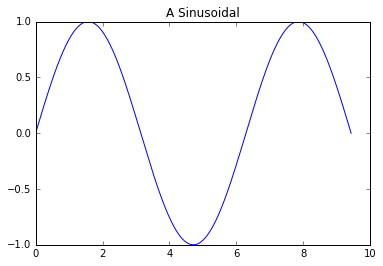

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x))
plt.title('A Sinusoidal')
plt.show()

Observar:

*Las líneas del "import" indican que se quieren usar las funciones definidas en otros módulos. Concretamente se quieren usar *numpy* y *matplotlib*. *Numpy* introduce un objeto para procesamiento numérico denominado *numpy array*, y *matplotlib* proporciona un conjunto de rutinas gráficas para dibujar.

*La línea `%matplotlib inline` es un comando especial de  `iPython` que indica que el gráfico se debe incrustar en el documento en vez de mostrarlo en otra ventana.

*La linea `x = np.linspace(0, 3*np.pi, 500)` crea un numpy array de la misma forma que `range()` crea listas de números. Concretamente se crea un array de 500 números reales entre 0 y 3*pi. 

*Las tres líneas  `plt`  crean un gráfico en x, y,le añaden título y muestran el dibujo.

### Más información

Sobre **Matplotlib** se puede encontrar información en http://matplotlib.org

Sobre los comandos iPython **magic** puede ser útil el siguiente enlace:
http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

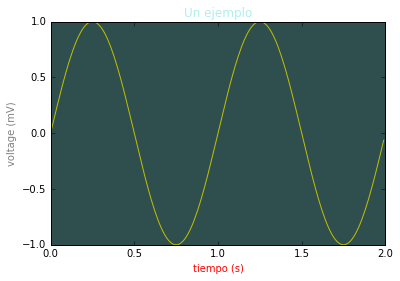

In [3]:
#!/usr/bin/env python
"""
matplotlib ofrece 4 caminos para especificar colores

    1) como una simple letra en forma de cadena.

    2) como una cadena de estilo hexadecimal de html o un nombre de color html. 

    3) como una tupla R, G, B donde R,G,B están en el rango entre 0 y 1

    4) como una cadena representando un número en coma flotante entre 0 y 1, correspondiente a las tonalidades de grises.


Ver help(colors) para más información
"""
from pylab import *

subplot(111, axisbg='darkslategray')
#subplot(111, axisbg='#ababab')
t = arange(0.0, 2.0, 0.01)
s = sin(2*pi*t)
plot(t, s, 'y')
xlabel('tiempo (s)', color='r')
ylabel('voltage (mV)', color='0.5') # color escala de grises
title('Un ejemplo', color='#afeeee')
show()


### Algunos enlaces útiles

http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master/

https://github.com/jrjohansson/scientific-python-lectures

#Ajuste de curvas

Objetivos:

* Generar datos originales y con ruido.

* Dibujar una linea o curva en la parte superior de un conjunto de datos

* Definir funciones que se ajusten a un conjunto de datos

* Obtener parámetros de ajustes y usarlos para dibujar

En primer lugar se van a fijar varias cosas:  

    * El comando %matplotlib magic permite dibujar gráficos en el documento

    * Se van a importar todas las rutinas de NumPy así como todas las rutinas para dibujar de matplotlib.
    
    * Se usarán algunas funciones del módulo scipy de Python.

In [4]:
#Código necesario para programar.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import optimize, polyfit

En primer lugar se van a crear datos usando una función conocida, y a continuación se les va añadir ruido. Entonces se intentará recuperar la función original con las que se generaron los datos.

En un contexto real, no se sabe la función que genero los datos pero podemos tener una idea de cómo debería ser la función. 

Vamos a crear datos de la función  $y = mx+b$, que es una función lineal, y a continuación le añadimos ruido.

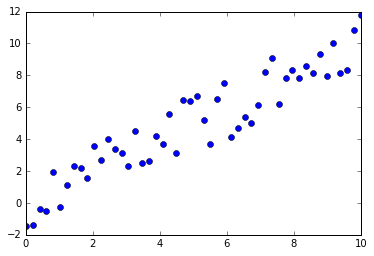

In [5]:
n = 50
ruido_amp = 4.0
x = np.linspace(0,10,n)
ruido = ruido_amp * (np.random.random(n)-.5)
y = x+ruido
plt.plot(x,y,'o')

Se va a intentar ajustar los datos usando la función **polyfit** del módulo numpy.  Esta función fija a un polinomio los datos $x,y$.  El polinomio de primer orden es un simple ajuste lineal. Los primeros dos argumentos de **polyfit**y son los valores x e y,y  el tercer argumento es el orden(en este caso es 1).

In [6]:
m,b = polyfit(x,y,1)
[m,b]

[1.0158151286378827, -0.098547193152851556]

Recordar que el parámetro $m$ corresponde a la relación ($\Delta y / \Delta x$).  El parámetro $b$ es el desplazamiento.  Para estos datos, nuestros datos proceden de la función, por lo que la pendiente deber ser 1 y el desplazamiento es 0.

Ahora, se añadirá una linea de ajuste a los datos. Para ello se usará el comando **plt.plot** con la opción *hold=True*.

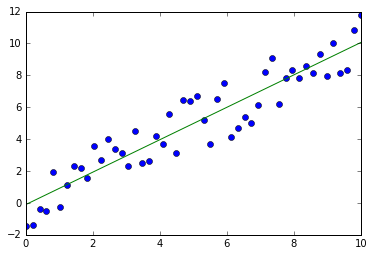

In [7]:
plt.plot(x,y,'o', hold=True)
t = np.array([0,10])
plt.plot(t,m*t+b)

Ahora vamos a definir nuestra propia función de ajuste y se usará la función **optimize.curve_fit**.

In [8]:
def funcion_ajuste(t, m, b):
    return m*t+b

In [9]:
p, cov = optimize.curve_fit(funcion_ajuste, x, y)
p

array([ 1.01581513, -0.09854719])

Ahora se dibuja nuevamente el gráfico, pero con leyenda y etiquetas.

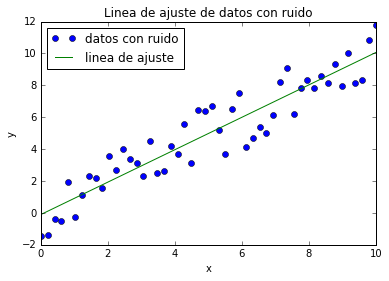

In [10]:
plt.plot(x,y,'o', hold=True)
t = np.array([0,10])
plt.plot(t,p[0]*t+p[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linea de ajuste de datos con ruido')
plt.legend(['datos con ruido','linea de ajuste'], loc=0)

In [11]:
help(optimize.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be dete

Ahora se ajustará a una función que no es lineal. Para ello se elige una distribución normal.

En este sentido se utilizar la función **normpdf** de **matplotlib.mlab**.

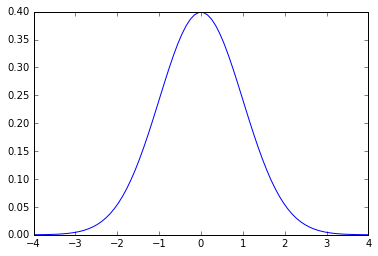

In [12]:
media = 0.0
var = 1.0
sigma = np.sqrt(var)
x = np.linspace(-4,4,80)
plt.plot(x,mlab.normpdf(x,media,sigma))

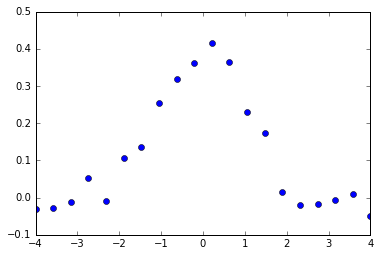

In [13]:
n = 20
x = np.linspace(-4,4,n)
ruido_amp = .1
ruido = ruido_amp * (np.random.random(n)-.5)
y = mlab.normpdf(x,media,sigma)+ruido
plt.plot(x,y,'o')

In [14]:
def ajuste_normal(t, media, var):
    return mlab.normpdf(t,media,var)

p, cov = optimize.curve_fit(ajuste_normal, x, y)
p

array([ 0.00734694,  0.98406693])

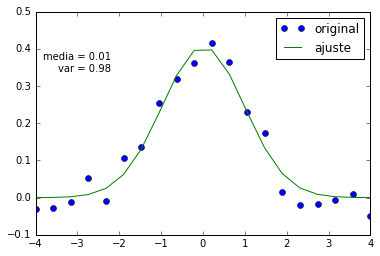

In [15]:
plt.plot(x,y,'o',hold=True)
plt.plot(x,ajuste_normal(x,p[0],p[1]),'-')
plt.legend(['original', 'ajuste'])
plt.text(-2.2,.34, 'media = %.2f\nvar = %.2f' % (p[0],p[1]), ha='right')

#Histogramas

Objetivos:

* Crear histogramascreate your own histograms

* Crear gráficos polares.

* Modificar el formato de los gráficos.

In [16]:
#Código necesario
%matplotlib inline
import numpy as np
import matplotlib.pyplot as p

In [17]:
datos = np.random.rand(1000)

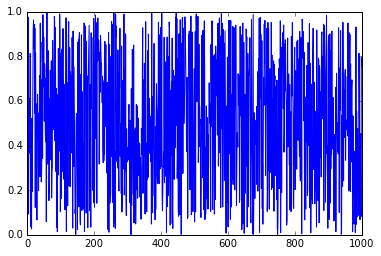

In [18]:
p.plot(datos)

(array([  93.,   98.,   94.,  102.,  103.,   96.,  100.,  100.,   98.,  116.]),
 array([  6.68461831e-04,   1.00551420e-01,   2.00434378e-01,
          3.00317336e-01,   4.00200294e-01,   5.00083252e-01,
          5.99966210e-01,   6.99849168e-01,   7.99732126e-01,
          8.99615085e-01,   9.99498043e-01]),
 <a list of 10 Patch objects>)

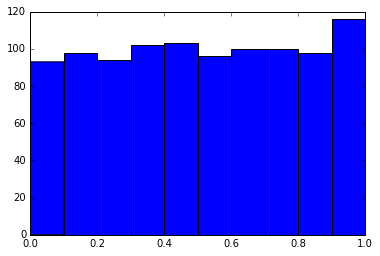

In [19]:
p.hist(datos)

(array([   3.,   22.,   57.,  148.,  219.,  251.,  174.,   70.,   46.,   10.]),
 array([-3.0861813 , -2.49571598, -1.90525067, -1.31478536, -0.72432004,
        -0.13385473,  0.45661058,  1.0470759 ,  1.63754121,  2.22800652,
         2.81847184]),
 <a list of 10 Patch objects>)

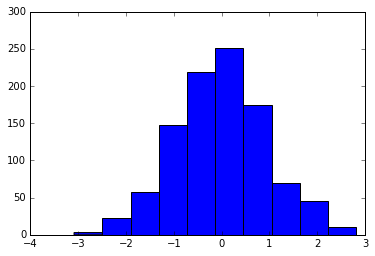

In [20]:
datos= np.random.randn(1000)
p.hist(datos)

In [21]:
help(p.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arra

(array([    1.,     3.,    10.,    25.,    48.,    82.,   152.,   230.,
          333.,   449.,   596.,   700.,   793.,   874.,   913.,   944.,
          975.,   990.,   996.,  1000.]),
 array([-3.0861813 , -2.79094864, -2.49571598, -2.20048333, -1.90525067,
        -1.61001801, -1.31478536, -1.0195527 , -0.72432004, -0.42908739,
        -0.13385473,  0.16137793,  0.45661058,  0.75184324,  1.0470759 ,
         1.34230855,  1.63754121,  1.93277387,  2.22800652,  2.52323918,
         2.81847184]),
 <a list of 20 Patch objects>)

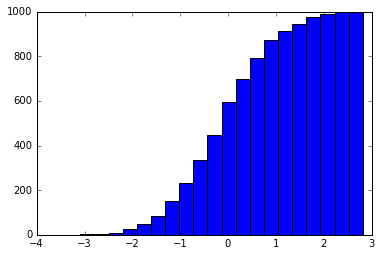

In [22]:
p.hist(datos, 20,cumulative=True)

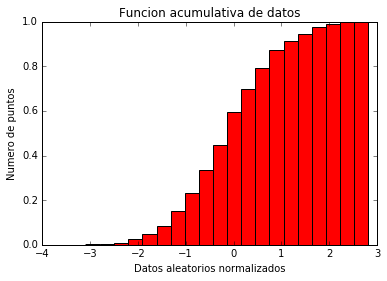

In [23]:
p.hist(datos, 20,normed=True,cumulative=True,color='r')
p.xlabel('Datos aleatorios normalizados')
p.ylabel('Numero de puntos')
p.title('Funcion acumulativa de datos')

In [24]:
x = np.arange(0, 360, 45)
x

array([  0,  45,  90, 135, 180, 225, 270, 315])

In [25]:
numero_picos= np.random.rand(8)*20


<Container object of 8 artists>

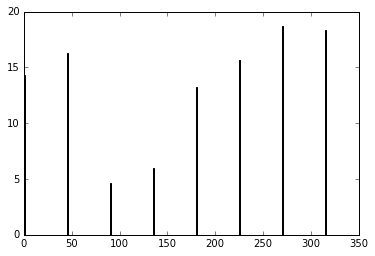

In [26]:
p.bar(x,numero_picos)

In [27]:
help(p.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

<Container object of 8 artists>

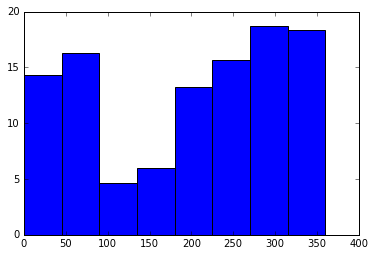

In [28]:
p.bar(x,numero_picos,width=45)


[0, 360, 0, 14]

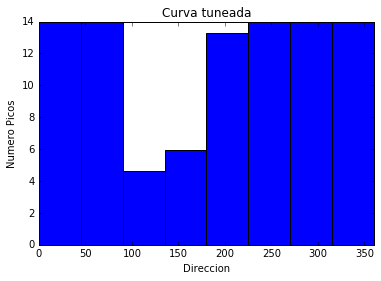

In [29]:
p.bar(x,numero_picos,width=45)
p.xlabel('Direccion')
p.ylabel('Numero Picos')
p.title('Curva tuneada')
p.axis([0, 360, 0, 14])


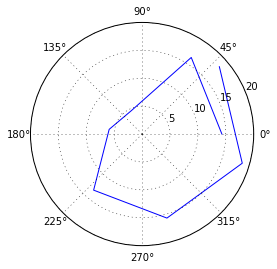

In [30]:
p.polar(numero_picos)

In [31]:
help(p.polar)

Help on function polar in module matplotlib.pyplot:

polar(*args, **kwargs)
    Make a polar plot.
    
    call signature::
    
      polar(theta, r, **kwargs)
    
    Multiple *theta*, *r* arguments are supported, with format
    strings, as in :func:`~matplotlib.pyplot.plot`.



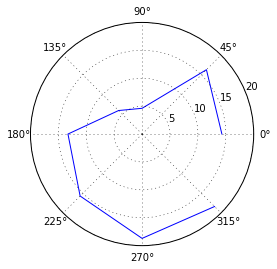

In [32]:
p.polar(x*np.pi/180,numero_picos)

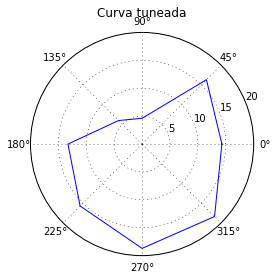

In [33]:
numero_picos2 = np.append(numero_picos,numero_picos[0])
r = np.arange(0, 361, 45)*np.pi/180
p.polar(r,numero_picos2)
p.title('Curva tuneada')